In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012009.csv")
df1['year'] = '2009'
df2 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012012.csv")
df2['year'] = '2012'
df3 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012015.csv")
df3['year'] = '2015'
df4 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012018.csv")
df4['year'] = '2018'

df = pd.concat([df1,df2,df3,df4])
df.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000,546339.000000
mean,23.374418,97.194787,94.210489,76.753333,4550.012919,42.599367,14.333556
std,15.680182,7.428644,12.775963,19.169529,3648.819736,30.172475,25.999679
min,6.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,16.000000,100.000000,93.330000,61.000000,2685.000000,16.670000,0.000000
50%,20.000000,100.000000,100.000000,80.000000,3530.000000,38.100000,0.000000
75%,26.000000,100.000000,100.000000,94.000000,4838.000000,65.520000,15.000000
max,1088.000000,100.000000,100.000000,100.000000,61684.000000,100.000000,100.000000


In [3]:
Nine = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2009'),'annual_consume']
Twelve = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2012'),'annual_consume']
Fifteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2015'), 'annual_consume']
Eighteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2018'), 'annual_consume']

In [4]:
Nine = Nine.reset_index(drop=True)
Twelve = Twelve.reset_index(drop=True)
Fifteen = Fifteen.reset_index(drop=True)
Eighteen = Eighteen.reset_index(drop=True)

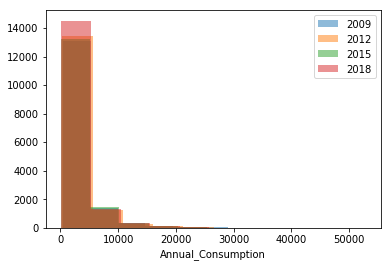

In [5]:
plt.hist(Nine, alpha=.5, label='2009')
plt.hist(Twelve, alpha=.5, label='2012')
plt.hist(Fifteen, alpha=.5, label='2015')
plt.hist(Eighteen, alpha=.5, label='2018')
plt.xlabel('Annual_Consumption')
plt.legend(loc='best')
plt.show()

In [6]:
Nine.describe()

count    15079.000000
mean      3574.515684
std       3316.270527
min        481.000000
25%       1998.000000
50%       2577.000000
75%       3800.500000
max      48012.000000
Name: annual_consume, dtype: float64

d = []
for n in range(10000):
    i = random.randint(1, 13000)
    d.append({'Three_yr_diff':(int(Twelve[i]-Nine[i]))})
pd.DataFrame(d)


In [7]:
First = pd.DataFrame()
for n in range(10000):
    i = random.randint(1, 15000)
    diff = pd.DataFrame({'Three_yr_diff':Twelve[i] - Nine[i]}, index=[i])
    First = pd.concat([First, diff])

In [8]:
Second = pd.DataFrame()
for n in range(10000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'Three_yr_diff':Fifteen[i] - Twelve[i]}, index=[i])
    Second = pd.concat([Second, diff])

In [9]:
Third = pd.DataFrame()
for n in range(10000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'Three_yr_diff':Eighteen[i] - Fifteen[i]}, index=[i])
    Third = pd.concat([Third, diff])

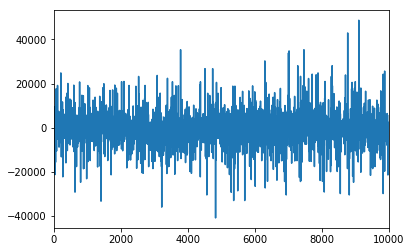

In [10]:
plotting = Third.reset_index()
plotting['Three_yr_diff'].plot()

In [11]:
First = First.reset_index()
Second = Second.reset_index()
Third = Third.reset_index()
First['period'] = 1
Second['period'] = 2
Third['period'] = 3

In [12]:
df2 = pd.DataFrame()
df2 = pd.concat([First,Second,Third])
df2.head()

,index,Three_yr_diff,period
0,1863,10649,1
1,9244,-938,1
2,7064,-3128,1
3,10905,-6565,1
4,6740,598,1


In [13]:
df2.describe()

,index,Three_yr_diff,period
count,30000.000000,30000.000000,30000.00000
mean,7524.243767,-87.455367,2.00000
std,4311.510597,4144.695337,0.81651
min,0.000000,-51722.000000,1.00000
25%,3811.000000,-1079.000000,1.00000
50%,7548.500000,-48.000000,2.00000
75%,11232.250000,982.000000,3.00000
max,15000.000000,50743.000000,3.00000


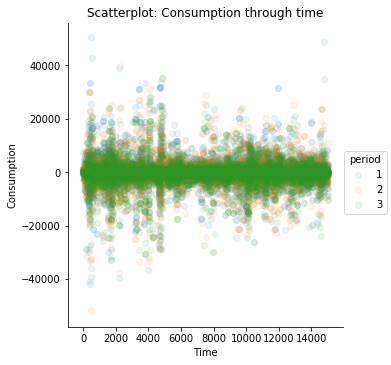

In [14]:
g = sns.lmplot(y='Three_yr_diff', # Variable 1.
               x='index', # Variable 2.
               data=df2, # Data
               fit_reg=False,
               hue='period',# If set to true, plots a regression line.
               scatter_kws={'alpha':0.09}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Consumption")
g.set_xlabels("Time")
plt.title('Scatterplot: Consumption through time')
plt.show()

In [15]:
Large = pd.DataFrame()
for n in range(10000):
    i = random.randint(1, 15000)
    diff = pd.DataFrame({'Three_yr_diff':Eighteen[i] - Nine[i]}, index=[i])
    Large = pd.concat([Large, diff])

In [16]:
Large = Large.reset_index(drop=True)
Large['period'] = 4
Large.describe()

,Three_yr_diff,period
count,10000.000000,10000.0
mean,-145.416900,4.0
std,4358.771213,0.0
min,-35322.000000,4.0
25%,-1313.250000,4.0
50%,-175.500000,4.0
75%,934.000000,4.0
max,42689.000000,4.0


In [17]:
df2 = pd.concat([First,Second,Third,Large])
df2.describe()

,Three_yr_diff,index,period
count,40000.000000,30000.000000,40000.000000
mean,-101.945750,7524.243767,2.500000
std,4199.257378,4311.510597,1.118048
min,-51722.000000,0.000000,1.000000
25%,-1135.000000,3811.000000,1.750000
50%,-77.000000,7548.500000,2.500000
75%,973.000000,11232.250000,3.250000
max,50743.000000,15000.000000,4.000000


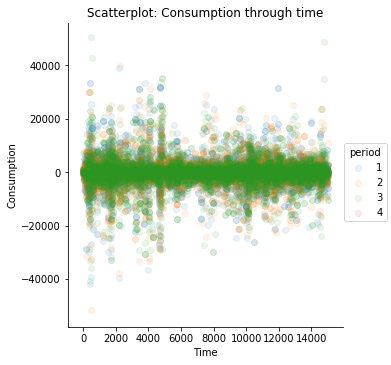

In [18]:
g = sns.lmplot(y='Three_yr_diff', # Variable 1.
               x='index', # Variable 2.
               data=df2, # Data
               fit_reg=False,
               hue='period',# If set to true, plots a regression line.
               scatter_kws={'alpha':0.09}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Consumption")
g.set_xlabels("Time")
plt.title('Scatterplot: Consumption through time')
plt.show()

In [19]:
# Large['Three_yr_diff'].plot()

sns.set(style="whitegrid")

g = sns.factorplot(x="index", y="Three_yr_diff", hue="period", data=df2,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()